In [1]:
import pyaurorax
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

In [2]:
# Download a single one-minute TREX RGB grid file
dataset = "TREX_NIR_GRID_MOSV001"
start_dt = datetime.datetime(2023, 3, 24, 8, 0, 0)
end_dt = datetime.datetime(2023, 3, 24, 8, 0, 0)
download_obj = aurorax.data.ucalgary.download(dataset, start_dt, end_dt)

In [3]:
# Read the grid file
data = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames)

data.pretty_print()

Data:
  data                  : GridData(grid=array(dims=(512, 1024, 10), dtype=float32), fill_value=-999, source_info=GridSourceInfoData(...)
  timestamp             : [10 datetimes]
  metadata              : [10 dictionaries]
  problematic_files     : []
  calibrated_data       : None
  dataset               : Dataset(name=TREX_NIR_GRID_MOSV001, short_description='TREx NIR All Sky Ima...)


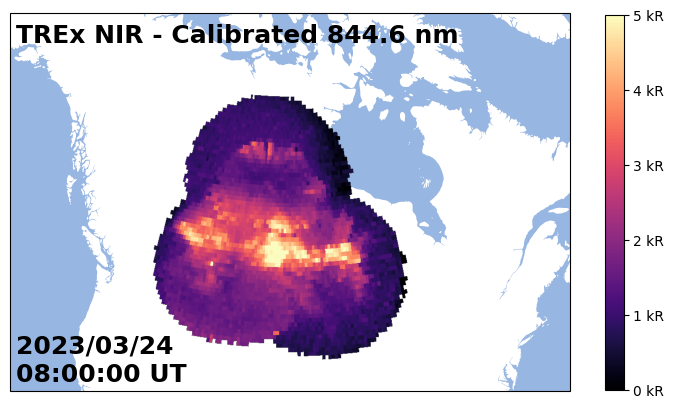

In [4]:
# Slice out a single frame of grid data
grid = data.data.grid[:, :, 0]
timestamp = data.timestamp[0]

# Grab the fill value used to represent grid cells with no data
fill_val = data.data.fill_value

# Set scaling bounds for intensity
rayleighs_scale = [0,5000]

# Prep the grid data for plotting (make non-data cells transparent)
rgba_grid = at.grid_files.prep_grid_image(grid, fill_val, scale=rayleighs_scale, cmap='magma')

# Create an empty map using cartopy
projection = cartopy.crs.NearsidePerspective(central_longitude=-100, central_latitude=55)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes((0, 0, 1, 1), projection=projection)
ax.set_extent([-130, -70, 35, 70], crs=cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)

# Overlay the grid data on the map
im = plt.imshow(rgba_grid, extent=(-180, 180, -90, 90), transform=cartopy.crs.PlateCarree(), origin='lower')
plt.text(0.01, 0.925, "TREx NIR - Calibrated 844.6 nm", transform=ax.transAxes, fontsize=18, weight='bold')
plt.text(0.01, 0.100, timestamp.strftime("%Y/%m/%d"), transform=ax.transAxes, fontsize=18, weight='bold')
plt.text(0.01, 0.025, timestamp.strftime("%H:%M:%S")+" UT", transform=ax.transAxes, fontsize=18, weight='bold')

# Create a custom colorbar
cmap = plt.get_cmap('magma')
norm = mpl.colors.Normalize(vmin=rayleighs_scale[0], vmax=rayleighs_scale[1])
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, orientation='vertical', ax=ax, pad=0.05, shrink=0.75)
cbar.set_ticks([sum(rayleighs_scale) * (i/5.0) for i in range(0,6)])
cbar.set_ticklabels(['0 kR', '1 kR', '2 kR', '3 kR', '4 kR', '5 kR'])

# Display the plot
plt.show()